# Evaluating cloud dilation options for Landsat Fmask <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with the `DEA Sandbox` environment
* **Products used:** 
[ga_ls5t_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls5t_ard_3),
[ga_ls7e_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls7e_ard_3),
[ga_ls8c_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls8c_ard_3),
[ga_ls9c_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls9c_ard_3)



## Getting started

### Load packages
Import Python packages used for the analysis.


In [1]:
import datacube
from datacube.utils.masking import make_mask
from odc.algo import mask_cleanup

import sys

sys.path.insert(1, "../Tools/")
from dea_tools.dask import create_local_dask_cluster

# Launch Dask cluster
client = create_local_dask_cluster(return_client=True)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/robbi.bishoptaylor@ga.gov.au/proxy/8787/status,
Dashboard: /user/robbi.bishoptaylor@ga.gov.au/proxy/8787/status,Workers: 1
Total threads: 31,Total memory: 237.21 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33323,Workers: 1
Dashboard: /user/robbi.bishoptaylor@ga.gov.au/proxy/8787/status,Total threads: 31
Started: Just now,Total memory: 237.21 GiB
Comm: tcp://127.0.0.1:35089,Total threads: 31
Dashboard: /user/robbi.bishoptaylor@ga.gov.au/proxy/36439/status,Memory: 237.21 GiB
Nanny: tcp://127.0.0.1:46197,


### Connect to the datacube

Connect to the datacube so we can access DEA data.
The `app` parameter is a unique name for the analysis which is based on the notebook file name.

In [2]:
dc = datacube.Datacube(app="Testing_cloud_dilation")

## Load data


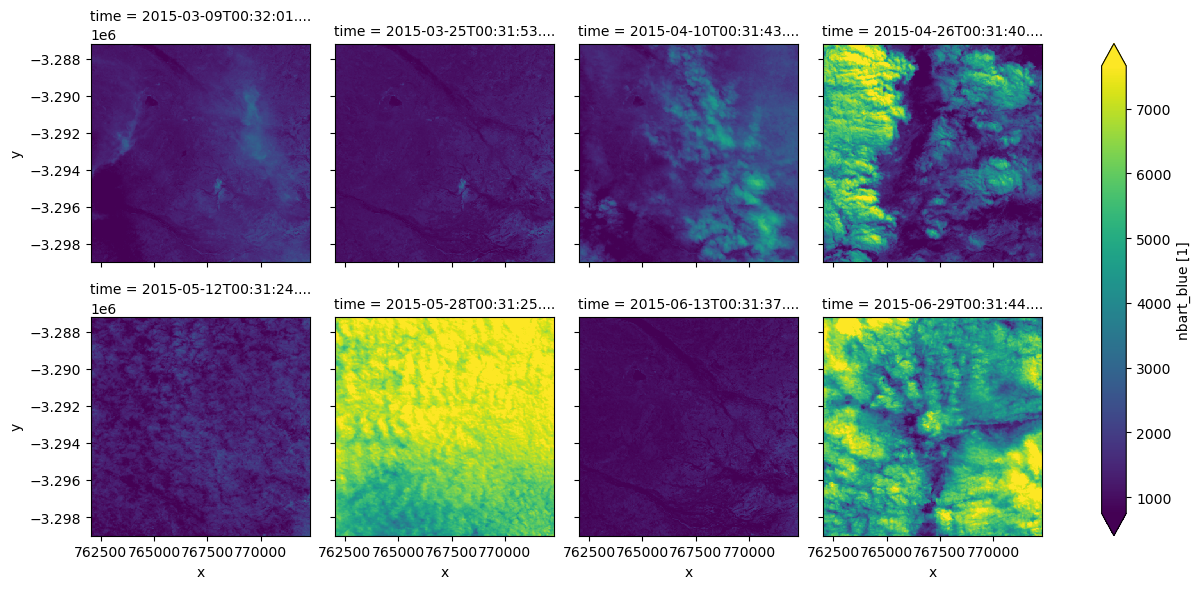

In [3]:
# Select spatiotemporal query (can be replaced with scene path/row)
query_params = dict(x=(140, 140.1), y=(-30, -30.1), time=("2015", "2016"))

# Set load params (measurements to load, Dask chunking, resampling etc)
load_params = dict(measurements=["nbart_blue", "oa_fmask"], dask_chunks={})

# Lazily load data
ds = dc.load(product="ga_ls8c_ard_3", **query_params, **load_params)

# Plot
ds.nbart_blue.isel(time=slice(4, 12)).plot.imshow(col="time", robust=True, col_wrap=4)

## Fmask cloud and shadow mask
Based on content from: https://docs.dea.ga.gov.au/notebooks/How_to_guides/Masking_data.html

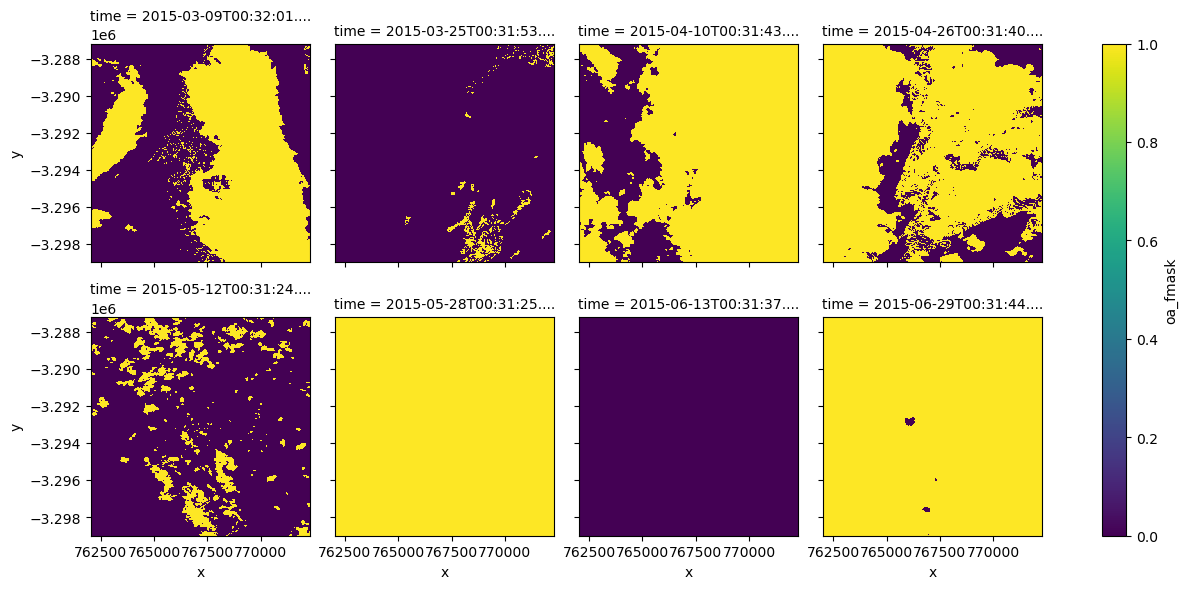

In [4]:
# Identify pixels that are either "cloud" or "cloud_shadow"
cloud_shadow_mask = make_mask(ds.oa_fmask, fmask="cloud") | make_mask(
    ds.oa_fmask, fmask="shadow"
)

# Plot
cloud_shadow_mask.isel(time=slice(4, 12)).plot(col="time", col_wrap=4)

### Applying dilation using `mask_cleanup`

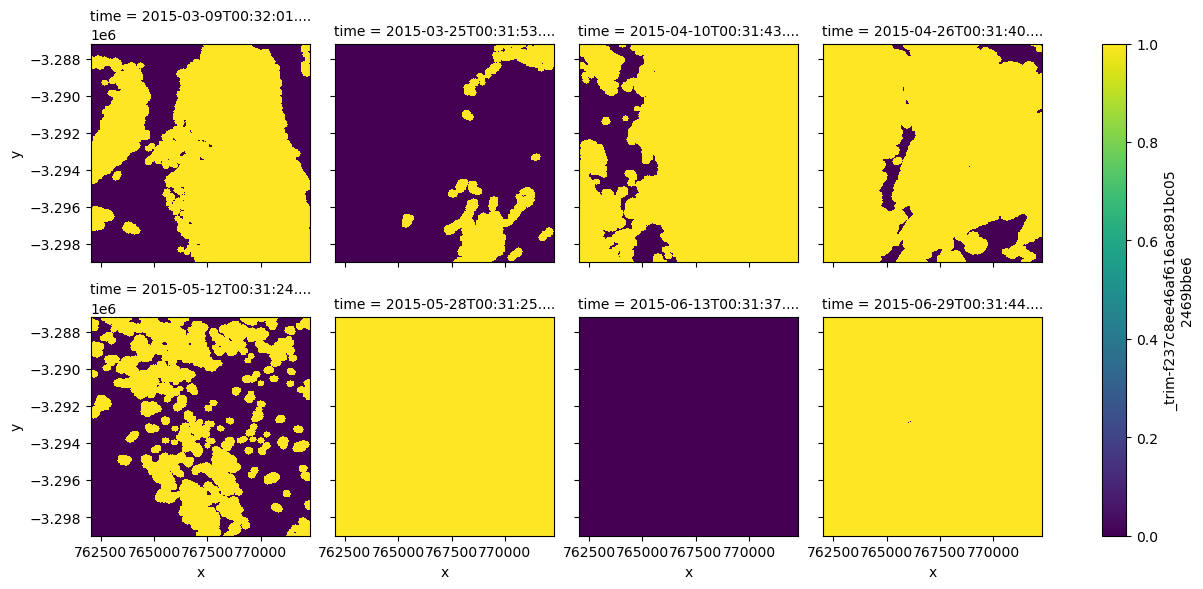

In [5]:
# Dilate all cloud and cloud shadow pixels by 5 pixels (uses a circular disk)
cloud_shadow_buffered = mask_cleanup(
    mask=cloud_shadow_mask, mask_filters=[("dilation", 5)]
)

# Plot
cloud_shadow_buffered.isel(time=slice(4, 12)).plot(col="time", col_wrap=4)

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** June 2023

**Compatible datacube version:** 

In [6]:
print(datacube.__version__)

1.8.13


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)